In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df = df.drop(index=0)

df['Class label'] = pd.to_numeric(df['Class label'])
df['Alcohol'] = pd.to_numeric(df['Alcohol'])
df['Malic acid'] = pd.to_numeric(df['Malic acid'])

In [44]:
df

,Class label,Alcohol,Malic acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
5,1,13.24,2.59
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

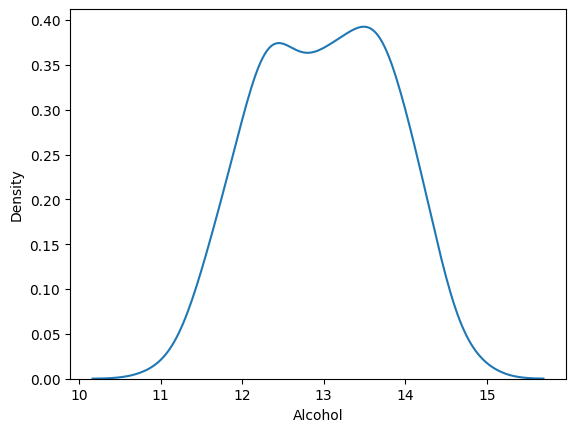

In [48]:
sns.kdeplot(data=df,x='Alcohol')

<Axes: xlabel='Malic acid', ylabel='Density'>

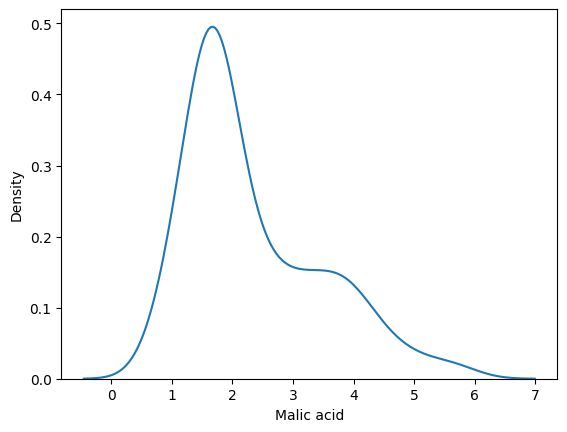

In [49]:
sns.kdeplot(data=df,x='Malic acid')

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

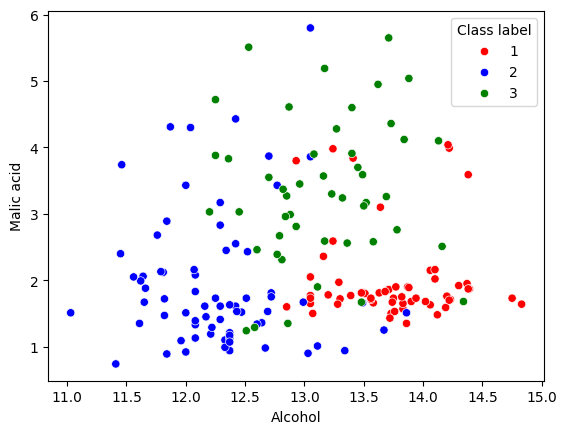

In [54]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)
# df.info()

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                   df['Class label'],
                                                   test_size=0.3,
                                                   random_state=0)

In [57]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [60]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [61]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


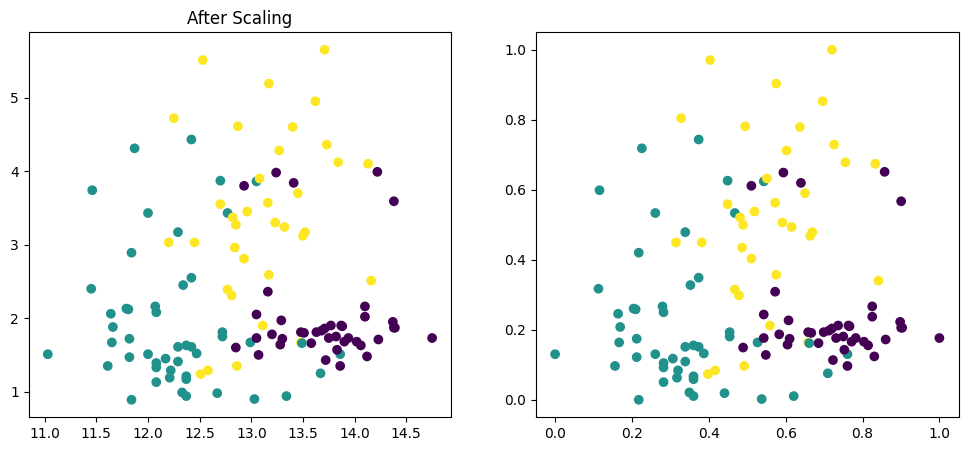

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'],c=y_train)
ax1.set_title("After Scaling")

plt.show()

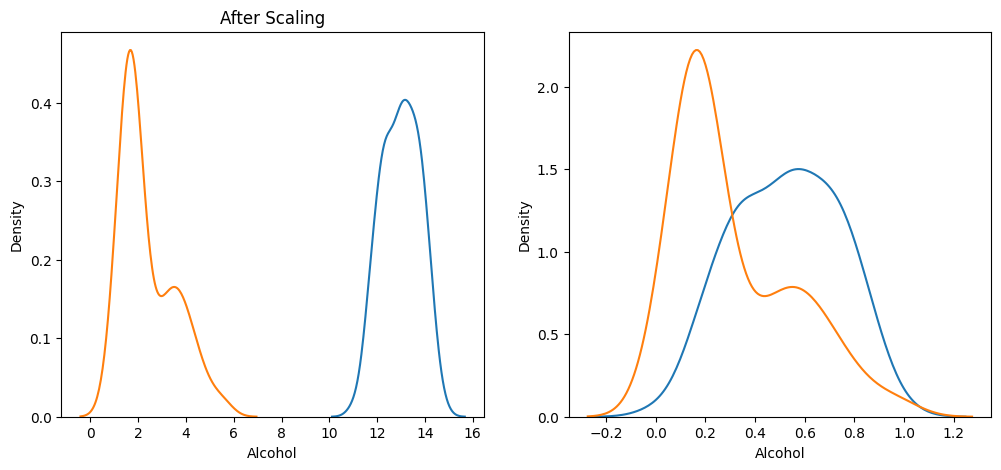

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

#after scaling
ax1.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)

plt.show()

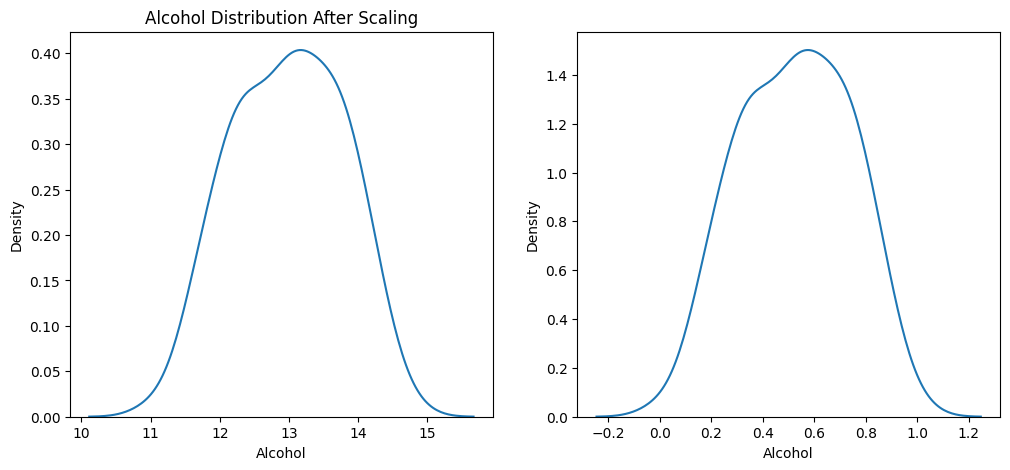

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)

#after scaling
ax1.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)

plt.show()

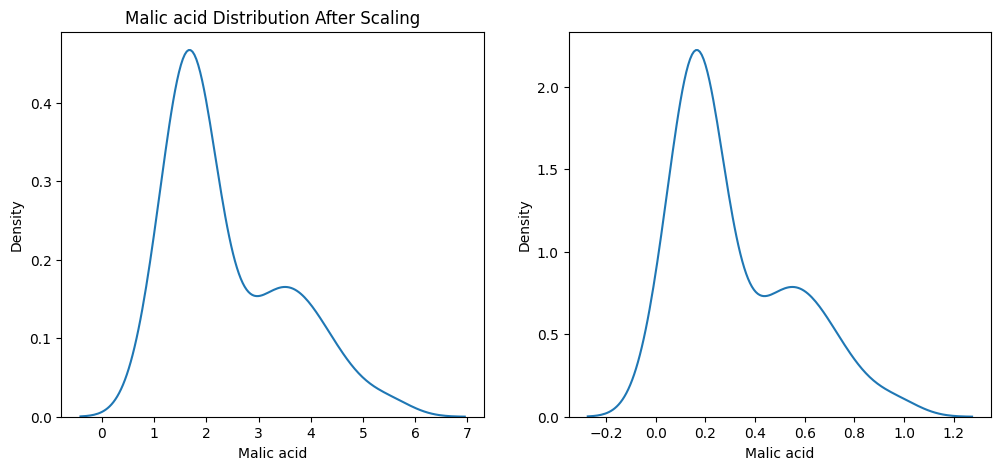

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1)

#after scaling
ax1.set_title('Malic acid Distribution After Scaling')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)

plt.show()